# Miscellaneous

* Importing Packages
* Defining data sources

Nothing really interesting happening here.  

In [675]:
import re
import pandas as pd
from collections import Counter
from itertools import chain

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pylab as plt
plt.style.use('ggplot')

# ggplot
from plotnine import *
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



In [157]:
df_reviews = pd.read_csv('reviews.tsv', sep='\t')
df_products = pd.read_csv('products.tsv', sep='\t')
df_extraInfo = pd.read_csv('products_extraInfo.csv')

# Data Exploration  

## Reviews.tsv

In [158]:
df_reviews.shape

(3849, 19)

In [159]:
%%time

df_reviews.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

Wall time: 29 ms


,uniqueCount,sample
abuseCount,5,"[0, 1, 2, 3, 4]"
customerNickname,351,"[iHerb Customer, InnaIgorevna, Maxchen, Mahaab..."
helpfulNo,8,"[0, 1, 2, 3, 4, 5, 9, 6]"
helpfulYes,33,"[6, 0, 1, 5, 4, 3, 21, 20, 16, 2, 31, 22, 8, 1..."
id,3765,"[05c2b17e-c28d-4792-930d-27e787d8d4ad, 80e44af..."
imagesCount,6,"[1, 0, 2, 4, 3, 5]"
languageCode,12,"[en-US, ru-RU, he-IL, ar-SA, ja-JP, es-MX, fr-..."
postedDate,3765,"[2021-01-27T09:04:10.569Z, 2021-02-07T00:56:39..."
productId,27,"[103839, 101691, 102455, 103204, 103205, 10384..."
profileInfo.ugcSummary.answerCount,79,"[0.0, 7.0, 1.0, 41.0, 2.0, 11.0, 8.0, 63.0, 32..."


In [160]:
df_reviews[df_reviews.abuseCount == 4]

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
1619,4,iHerb Customer,1,50,1b984b26-b290-4ffb-8e8e-8ed8cbb5dbdd,1,en-US,2020-05-20T17:39:59.67Z,99829,0.0,6.0,40,"Bought this on a whim as a ""trial"" offer on iH...","Fits securely, stylish, should offer some prot...",True,1.609048e+09,en-US,NaN,NaN


## Products.tsv

In [161]:
df_products.shape

(27, 7)

In [162]:
%%time

df_products.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

Wall time: 5 ms


,uniqueCount,sample
product_id,27,"[103205, 101774, 101955, 103838, 102734, 10083..."
product_name,26,"[Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )..."
product_price,18,"[2.95, 8.86, 6.85, 15.35, 5.61, 3.93, 50.19, 6..."
price_currency,1,[AUD]
product_availability,1,[http://schema.org/InStock]
product_url,27,[https://au.iherb.com/pr/Hwipure-Disposable-KF...
source_url,1,[https://au.iherb.com/c/protective-face-masks]


In [163]:
cols_product = [
    'product_id',      # 27 unique products in reviews too
    'product_name',    # one duplicated name
    'product_price',   # all prices in AUD
    'product_url'      # find the page for the mask
]

In [164]:
df_products = df_products[cols_product]

## Extra Info

In [958]:

df_extraInfo.head()

,Unnamed: 0,Brand,ProductDescription,ProductRating,ProductSpecList,Q&ACount,RatingCount,product_id,product_url
0,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,384 Ratings,103205,https://au.iherb.com/pr/Hwipure-Disposable-KF9...
1,1,HIGUARD,Description\nMade In Korea\nDisinfection KF94 ...,4.6,Expiration Date:? November 2023\nDate First Av...,3 & 10,318 Ratings,101774,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...
2,2,SunJoy,Description\nMade in China\nMedical Use Prohib...,4.5,Expiration Date:? January 2024\nDate First Ava...,10 & 58,995 Ratings,101955,https://au.iherb.com/pr/SunJoy-KN95-Profession...
3,3,Lozperi,Description\nMade in Korea\nMade with Copper I...,4.6,Expiration Date:? January 2025\nDate First Ava...,9 & 29,317 Ratings,103838,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...
4,4,Zidian,Description\nMade in China\nEffectively Block ...,4.7,Expiration Date:? January 2025\nDate First Ava...,7 & 48,564 Ratings,102734,https://au.iherb.com/pr/Zidian-Disposable-Prot...


In [957]:
df_extraInfo.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T.iloc[1:,:]

,uniqueCount,sample
Brand,16,"[Hwipure, HIGUARD, SunJoy, Lozperi, Zidian, La..."
ProductDescription,24,[Description\nMade in Korea\nKF94 Protection M...
ProductRating,9,"[4.6, 4.5, 4.7, 4.3, 4.2, 4.4, 3.4, 3.9, 4.1]"
ProductSpecList,27,[Expiration Date:? August 2023\nDate First Ava...
Q&ACount,18,"[3 & 18, 3 & 10, 10 & 58, 9 & 29, 7 & 48, 8 & ..."
RatingCount,25,"[384 Ratings, 318 Ratings, 995 Ratings, 317 Ra..."
product_id,27,"[103205, 101774, 101955, 103838, 102734, 10083..."
product_url,27,[https://au.iherb.com/pr/Hwipure-Disposable-KF...


The 27 products mentioned came from 16 Brands.  

## Join Data

In [167]:
df_products = pd.merge(df_products, df_extraInfo,
        on = ['product_id', 'product_url'], how = 'inner')

In [168]:
%%time

df_productReview = pd.merge(df_products, df_reviews,
                           left_on = 'product_id', right_on = 'productId',
                           how = 'inner')

display(df_productReview.head())
df_productReview.apply(lambda x: pd.Series({'uniqueCount':len(x.unique()), 'sample': x.unique().tolist()}) , axis = 0).T

,product_id,product_name,product_price,product_url,Unnamed: 0,Brand,ProductDescription,ProductRating,ProductSpecList,Q&ACount,...,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,0.0,24.0,50,"It is good to get such a mask, as they have re...",Excellent!,False,1.620257e+09,en-US,NaN,NaN
1,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,0.0,179.0,50,N95 and KF94 masks look similar and filter an ...,Excellent!,True,1.619532e+09,en-US,NaN,NaN
2,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,282.0,108.0,50,Очень комфортная маска. Рассчитана данная маск...,Очень комфортная маска.,False,1.614688e+09,ru-RU,Very comfortable mask. This mask is designed f...,en-US
3,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,396.0,119.0,50,Очень удобная маска ! Для маленького лица боль...,Прекрасно!,True,1.613859e+09,ru-RU,Very comfortable mask! Large for a small face....,en-US
4,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,1.0,87.0,40,"Мне нравятся эти маски, единственный минус - э...",Хорошая защитная макска,False,1.612914e+09,ru-RU,"I like these masks, the only negative is that ...",en-US


Wall time: 93 ms


,uniqueCount,sample
product_id,27,"[103205, 101774, 101955, 103838, 102734, 10083..."
product_name,26,"[Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 )..."
product_price,18,"[2.95, 8.86, 6.85, 15.35, 5.61, 3.93, 50.19, 6..."
product_url,27,[https://au.iherb.com/pr/Hwipure-Disposable-KF...
Unnamed: 0,27,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Brand,16,"[Hwipure, HIGUARD, SunJoy, Lozperi, Zidian, La..."
ProductDescription,24,[Description\nMade in Korea\nKF94 Protection M...
ProductRating,9,"[4.6, 4.5, 4.7, 4.3, 4.2, 4.4, 3.4, 3.9, 4.1]"
ProductSpecList,27,[Expiration Date:? August 2023\nDate First Ava...
Q&ACount,18,"[3 & 18, 3 & 10, 10 & 58, 9 & 29, 7 & 48, 8 & ..."


In [169]:
# df_productReview.to_csv('ProductReviews.csv')

# Cleaning

## Preliminary Questions  

* Data understanding   
    * abuseCount  
    * helpfulNo
    * helpfulYes
    * profileInfo.ugcSummary.answerCount
    * profileInfo.ugcSummary.reviewCount	
    * score

<br>  

* Does each *id* uniquely identify each user making the comment?
    * currently assumed to be so as reviews.tsv has 3849 rows while there is only 3765 *id* values  
* Any additional information that may be useful?  

In [170]:
display(df_productReview.head())
display(df_productReview.shape)

,product_id,product_name,product_price,product_url,Unnamed: 0,Brand,ProductDescription,ProductRating,ProductSpecList,Q&ACount,...,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,translation.reviewTitle
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,0.0,24.0,50,"It is good to get such a mask, as they have re...",Excellent!,False,1.620257e+09,en-US,NaN,NaN
1,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,0.0,179.0,50,N95 and KF94 masks look similar and filter an ...,Excellent!,True,1.619532e+09,en-US,NaN,NaN
2,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,282.0,108.0,50,Очень комфортная маска. Рассчитана данная маск...,Очень комфортная маска.,False,1.614688e+09,ru-RU,Very comfortable mask. This mask is designed f...,en-US
3,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,396.0,119.0,50,Очень удобная маска ! Для маленького лица боль...,Прекрасно!,True,1.613859e+09,ru-RU,Very comfortable mask! Large for a small face....,en-US
4,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,0,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,Expiration Date:? August 2023\nDate First Avai...,3 & 18,...,1.0,87.0,40,"Мне нравятся эти маски, единственный минус - э...",Хорошая защитная макска,False,1.612914e+09,ru-RU,"I like these masks, the only negative is that ...",en-US


(3849, 30)

In [171]:
# languageCode is identical to languageCode.1
sum(df_productReview['languageCode'] != df_productReview['languageCode.1'])

0

In [172]:
df_productReview.columns

Index(['product_id', 'product_name', 'product_price', 'product_url',
       'Unnamed: 0', 'Brand', 'ProductDescription', 'ProductRating',
       'ProductSpecList', 'Q&ACount', 'RatingCount', 'abuseCount',
       'customerNickname', 'helpfulNo', 'helpfulYes', 'id', 'imagesCount',
       'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'translation.reviewTitle'],
      dtype='object')

In [173]:
# df_productReview['reviewTitle'].to_excel('reviews_title.xlsx', index = False)
translatedTitle = pd.read_excel('reviews_title.xlsx')

# translating title
df_productReview['translation.reviewTitle'] = translatedTitle['reviewTitle']

In [174]:
df_productReview['translation.reviewText'] = df_productReview['translation.reviewText'].combine_first(df_productReview.reviewText)

In [204]:
# languageCode is identical to languageCode.1
# score are all in 1.61e9 range, very little variance, dont know what it is for
# 'profileInfo.ugcSummary.answerCount',
# 'profileInfo.ugcSummary.reviewCount', 
# 'abuseCount', 'helpfulNo', 'helpfulYes', dont know the meaning
# 'customerNickname', most of the customer has an alias of iHerb, hence this data is practicality useless

keep_cols = [
    # product information
    'product_id', 'product_name', 'product_price',
    'Brand', 'ProductDescription', 'ProductRating',
    'Q&ACount', 'RatingCount', 'ProductSpecList',
    
    # review infromation
    'id', 'imagesCount', 'languageCode', 'ratingValue',
    'translation.reviewText', 'translation.reviewTitle'
]

In [326]:
df_productReview_clean = df_productReview[keep_cols]

In [327]:
# all products contains (KF94)|(N95)|(KN95)|(FFP2) keywords
sum(df_productReview_clean.product_name.str.contains('[(KF94)|(N95)|(KN95)|(FFP2)]', case = False))

# made in XXXX
display('Made in:')
display(df_productReview_clean.ProductDescription.str.upper().str.extract('MADE IN (\w+)').iloc[:,0].unique())

df_productReview_clean['MadeIn'] = df_productReview_clean.ProductDescription.str.upper().str.extract('MADE IN (\w+)')

'Made in:'

array(['KOREA', 'CHINA', 'USA'], dtype=object)

In [328]:
# question and answer raised to a product
df_productReview_clean['ProductQuestion'] = df_productReview_clean['Q&ACount'].str.extract('(\d+) &')
df_productReview_clean['ProductAnswer'] = df_productReview_clean['Q&ACount'].str.extract('& (\d+)').iloc[:,0]

In [329]:
df_productReview_clean['RatingCount'] =  df_productReview_clean['RatingCount'].str.extract('(\d+) Ratings')

In [435]:
numeric_cols = ['product_price', 'ProductRating', 'RatingCount',
               'imagesCount', 'ratingValue', 'ProductQuestion', 'ProductAnswer']

for col in numeric_cols:
    df_productReview_clean[col] = pd.to_numeric(df_productReview_clean[col])

In [334]:
# change id to str
df_productReview_clean['product_id'] = df_productReview_clean['product_id'].apply(str)

In [400]:
# sort the str according to the number of reviews

In [409]:
product_list = df_productReview_clean['product_id'].value_counts().index.tolist()
product_cat = pd.Categorical(df_productReview_clean['product_id'], categories=product_list)
df_productReview_clean['product_id'] = product_cat

In [410]:
df_productReview_clean

,product_id,product_name,product_price,Brand,ProductDescription,ProductRating,Q&ACount,RatingCount,ProductSpecList,id,imagesCount,languageCode,ratingValue,translation.reviewText,translation.reviewTitle,MadeIn,ProductQuestion,ProductAnswer
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,3 & 18,384,Expiration Date:? August 2023\nDate First Avai...,f994c3a0-c667-47a3-ba13-b18926b3a5c1,0,en-US,50,"It is good to get such a mask, as they have re...",Excellent!,KOREA,3,18
1,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,3 & 18,384,Expiration Date:? August 2023\nDate First Avai...,018c2770-792e-4461-bb46-817134d645f1,0,en-US,50,N95 and KF94 masks look similar and filter an ...,Excellent!,KOREA,3,18
2,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,3 & 18,384,Expiration Date:? August 2023\nDate First Avai...,e9884291-6c59-4e42-8129-d1d7036fc40a,0,ru-RU,50,Very comfortable mask. This mask is designed f...,Very comfortable mask.,KOREA,3,18
3,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,3 & 18,384,Expiration Date:? August 2023\nDate First Avai...,4b7f0287-22b4-4562-bf30-f8c6a048fc90,0,ru-RU,50,Very comfortable mask! Large for a small face....,Perfectly!,KOREA,3,18
4,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,Hwipure,Description\nMade in Korea\nKF94 Protection Ma...,4.6,3 & 18,384,Expiration Date:? August 2023\nDate First Avai...,7b3482a0-a131-45af-863e-0df2a586678d,0,ru-RU,40,"I like these masks, the only negative is that ...",Good protective mask,KOREA,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3844,101029,"Landsberg, 3 Ply Disposable Protective Face Ma...",36.54,Landsberg,Description\nMade in China\nNon- Medical\n3 Pl...,4.1,2 & 10,50,Expiration Date:? January 2025\nDate First Ava...,9cfe4996-4ace-428f-9abe-4045700f8efb,0,en-US,20,Good and effective size mask for a child or a ...,Small size,CHINA,2,10
3845,101029,"Landsberg, 3 Ply Disposable Protective Face Ma...",36.54,Landsberg,Description\nMade in China\nNon- Medical\n3 Pl...,4.1,2 & 10,50,Expiration Date:? January 2025\nDate First Ava...,35d89490-952d-4323-b0fd-4ec8edc59412,0,en-US,50,These masks seem comparable with other 3 ply m...,Good Product,CHINA,2,10
3846,101029,"Landsberg, 3 Ply Disposable Protective Face Ma...",36.54,Landsberg,Description\nMade in China\nNon- Medical\n3 Pl...,4.1,2 & 10,50,Expiration Date:? January 2025\nDate First Ava...,bcd1c6de-0d36-4100-9e40-cd402af6a760,0,en-US,40,These masks seem to be pretty good but kind of...,Pretty good,CHINA,2,10
3847,101029,"Landsberg, 3 Ply Disposable Protective Face Ma...",36.54,Landsberg,Description\nMade in China\nNon- Medical\n3 Pl...,4.1,2 & 10,50,Expiration Date:? January 2025\nDate First Ava...,1825c633-765f-498b-ae09-268cbd8abb5a,0,en-US,40,gave them to my essential worker son who has n...,gave them to my essential worker son,CHINA,2,10


In [336]:
df_productReview_clean.columns

Index(['product_id', 'product_name', 'product_price', 'Brand',
       'ProductDescription', 'ProductRating', 'Q&ACount', 'RatingCount',
       'ProductSpecList', 'id', 'imagesCount', 'languageCode', 'ratingValue',
       'translation.reviewText', 'translation.reviewTitle', 'MadeIn',
       'ProductQuestion', 'ProductAnswer'],
      dtype='object')

# Visualisations  

## Intermediate Questions  

* what is the relationship of each variable to the number of reviews that they receive 
* what is the most popular brand, product etc.  
* 

In [217]:
cols = [
    'Brand', 'product_id', 'MadeIn',
 'product_price', 'imagesCount',
 'ratingValue', 'languageCode',]

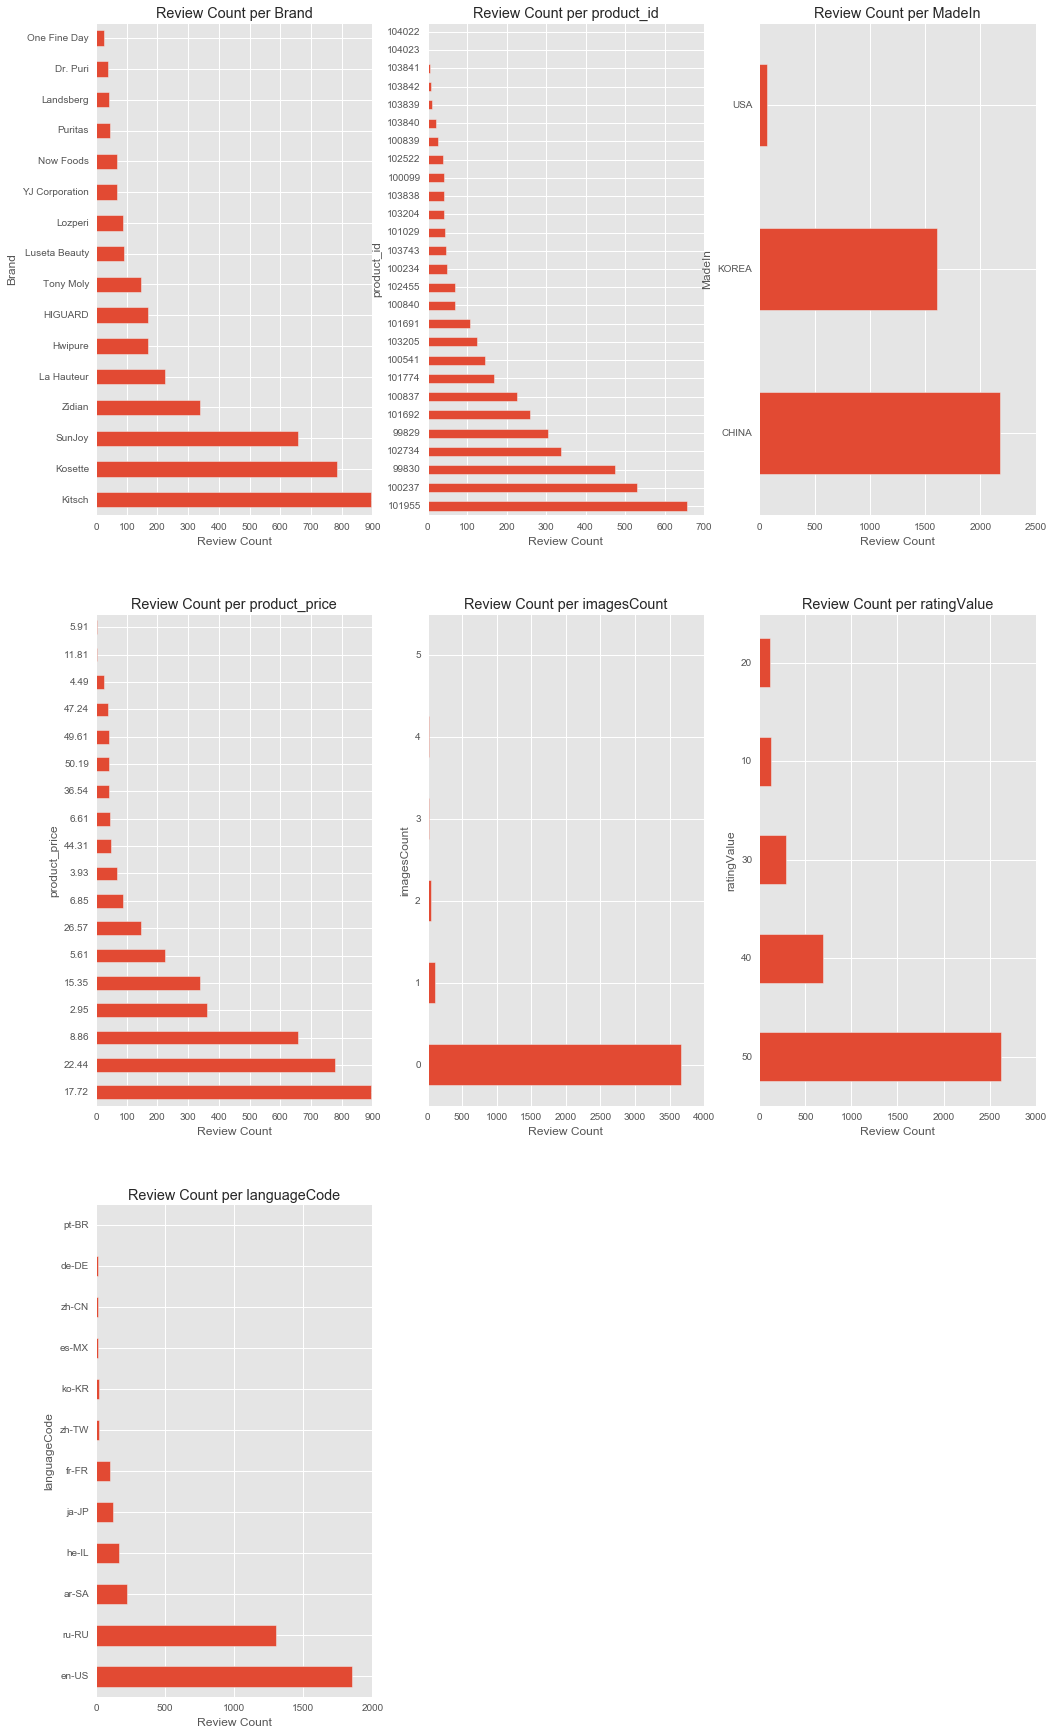

In [387]:
plt.figure(figsize=(15, 30))

for i in range(len(cols)):
#for i in range(0, 3):
    plt.subplot((len(cols)//3)+1, 3, i+1)
    df_productReview_clean[cols[i]].value_counts().plot.barh()
    plt.title(f"Review Count per {cols[i]}")
    plt.ylabel(cols[i])
    plt.xlabel('Review Count')

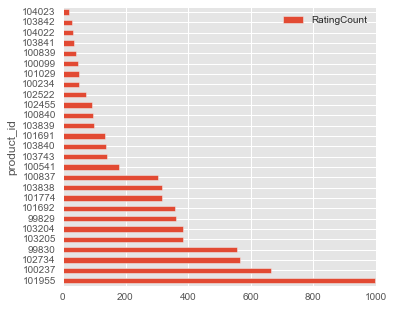

In [354]:
df_productReview_clean.groupby('product_id').agg({'RatingCount': lambda x: x.mean()}).sort_values('RatingCount', ascending = 0).plot.barh(figsize = (5,5))

<font color= 'green'> **Observations** </font>  
Under the naive assumption that the number of reviews in the dataset may represent the popularity of the product, the plots above yield the following observation:  

* most popular brand --> Kitsch
* most popular product --> 101955  
* most popular product origin --> China  
* the top few prices with the most number of review spread across a huge range with no obvious trend, indicating that price may not be the most significant attribute  
* most review does not come from pictures  
* Most product get full mark --> assumed to be 50 max
* Main purchase source --> US, Russia, Saudi Arabia?

<br>
<hr>
<br>  

<font color= 'Orange'> **New Question** </font>  

* how reliable is the number of reviews to be assumed as the popularity?  
* for those top few products, what are their:
    * ratings
    * country of production
    * Company  

RatingCount  ReviewCount
Brand          MadeIn product_id product_price                          
Dr. Puri       KOREA  102522     47.24                   75           40
HIGUARD        KOREA  101774     2.95                   318          168
Hwipure        KOREA  103204     50.19                  384           42
                      103205     2.95                   384          126
Kitsch         CHINA  100237     17.72                  665          530
                      101691     17.72                  134          107
                      101692     17.72                  358          259
Kosette        CHINA  104022     11.81                   32            2
                      104023     5.91                    21            2
               KOREA  99829      22.44                  362          304
                      99830      22.44                  557          475
La Hauteur     KOREA  100837     5.61                   303          225
Landsberg      CHINA  101029     36.54                   50           43
Lozperi        KOREA  103838     6.85                   317           42
                      103839     6.85                    98           12
                      103840     6.85                   139           20
                      103841     6.85                    35            7
                      103842     6.85                    29            8
Luseta Beauty  CHINA  100099     49.61                   47           41
                      100234     44.31                   50           49
Now Foods      USA    102455     2.95                    94           68
One Fine Day   KOREA  100839     4.49                    41           25
Puritas        KOREA  103743     6.61                   140           46
SunJoy         CHINA  101955     8.86                   995          658
Tony Moly      CHINA  100541     26.57                  179          145
YJ Corporation KOREA  100840     3.93                    95           68
Zidian         CHINA  102734     15.35                  564          337

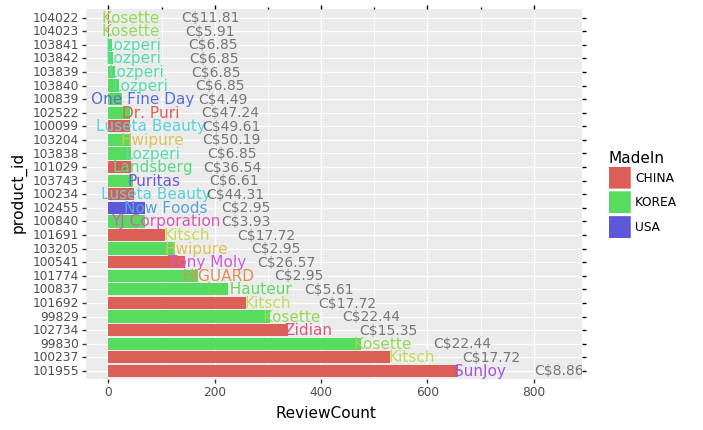

<ggplot: (-9223371930553759568)>

In [396]:
df_reviewCount = df_productReview_clean.groupby(['Brand', 'MadeIn', 'product_id', 'product_price']).agg({
    'RatingCount': lambda x: x.mean(),
    'id': len                                                                  })
# df_reviewCount.columns = ['RatingCount', 'ReviewCount']
df_reviewCount.rename(columns =  {'id':'ReviewCount'}, inplace = True)
display(df_reviewCount)

df_reviewCount.reset_index(inplace = True)
df_reviewCount['product_price'] = df_reviewCount.product_price.apply(lambda x: 'C$' + str(x))
df_reviewCount = df_reviewCount.sort_values('ReviewCount', ascending = 0)

product_list = df_reviewCount['product_id'].tolist()
product_cat = pd.Categorical(df_reviewCount['product_id'], categories=product_list)

# assign to a new column in the DataFrame
df_reviewCount = df_reviewCount.assign(product_id = product_cat)

ggplot(data = df_reviewCount) +\
geom_col(mapping = aes(x = 'product_id', y = 'ReviewCount', fill = 'MadeIn'), stat = 'identity') +\
geom_text(mapping = aes(x = 'product_id', y = 'ReviewCount', label = 'Brand', color = 'Brand' ), 
          nudge_y = 40,
         show_legend = False) +\
geom_text(mapping = aes(x = 'product_id', y = 'ReviewCount', label = 'product_price'), 
          nudge_y = 190,
          size = 10,
          alpha = 0.5,
         show_legend = False) +\
coord_flip()

While there are some discrepencies in the data scraped vs the data provided, the general trend(top few) are still the same.  
Subsequent analysis will follow the data provided instead.  

**RatingCount** was obtained from scraping;  
**ReviewCount** was obtained from data given  

<br>
<hr>
<br>  

<font color= 'Green'> **Observations** </font>  

It is clear that:
* China is more popular in terms of number of reviews, 3 out of the top 5
* Followed by Korea products
* One interesting fact is that:
    * among the top few product, the price of China product is consistently lower than Korean Product
    * consumers are willing to pay more for Korean product versus China product    
    

<br>
<hr>
<br>  

<font color= 'Orange'> **New Question** </font>  

* who is buying these products?  

In [451]:
temp

,product_id,Q&ACount,ProductQuestion,ProductAnswer,Count,ProductDescription,QAratio
1001,101955,10 & 58,10,58,658.0,3414.0,5.80
6199,100237,4 & 23,4,23,530.0,1358.0,5.75
8567,99830,17 & 84,17,84,475.0,1959.0,4.94
14209,102734,7 & 48,7,48,337.0,1971.0,6.86
18100,99829,8 & 25,8,25,304.0,1960.0,3.12
19826,101692,2 & 6,2,6,259.0,1493.0,3.00
25444,100837,8 & 25,8,25,225.0,1192.0,3.12
27597,101774,3 & 10,3,10,168.0,1115.0,3.33
32123,100541,5 & 22,5,22,145.0,750.0,4.40
35352,103205,3 & 18,3,18,126.0,1376.0,6.00


In [450]:
temp = df_productReview_clean.groupby(['product_id', 
                                       'Q&ACount', 
                                       'ProductQuestion',
                                      'ProductAnswer']).agg({'id': len,
                                                            'ProductDescription': lambda x: len(x.iloc[0])})
temp.reset_index(inplace = True)
temp.rename(columns = {'id': 'Count'}, inplace = True)
temp = temp[~temp.Count.isnull()]
temp['QAratio'] = (temp['ProductAnswer']/ temp['ProductQuestion']).round(2)

In [442]:
df_productReview_clean.columns

Index(['product_id', 'product_name', 'product_price', 'Brand',
       'ProductDescription', 'ProductRating', 'Q&ACount', 'RatingCount',
       'ProductSpecList', 'id', 'imagesCount', 'languageCode', 'ratingValue',
       'translation.reviewText', 'translation.reviewTitle', 'MadeIn',
       'ProductQuestion', 'ProductAnswer'],
      dtype='object')

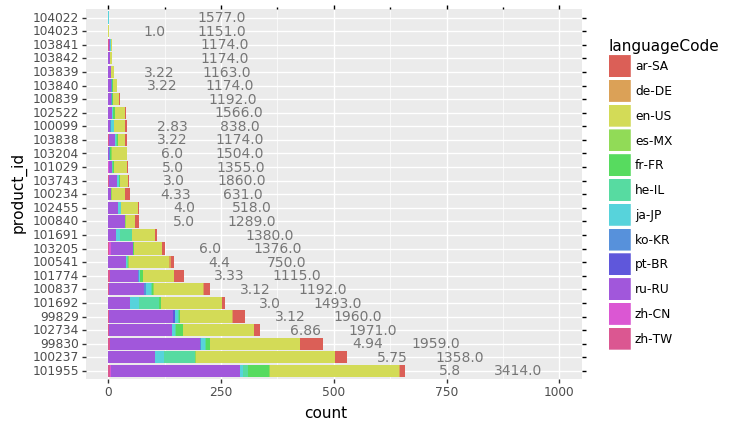

<ggplot: (-9223371930554996336)>

In [473]:
ggplot(data = df_productReview_clean) +\
geom_bar(mapping = aes(x = 'product_id', fill = 'languageCode')) +\
geom_text(data = temp,
          mapping = aes(x = 'product_id', y = 'Count', label = 'QAratio'),
         size = 10,
         nudge_y = 100, alpha = 0.5) +\
geom_text(data = temp,
          mapping = aes(x = 'product_id', y = 'Count', 
                        label = 'ProductDescription'),
         size = 10,
         nudge_y = 250, alpha = 0.5) +\
ylim(0, 1000) +\
coord_flip()

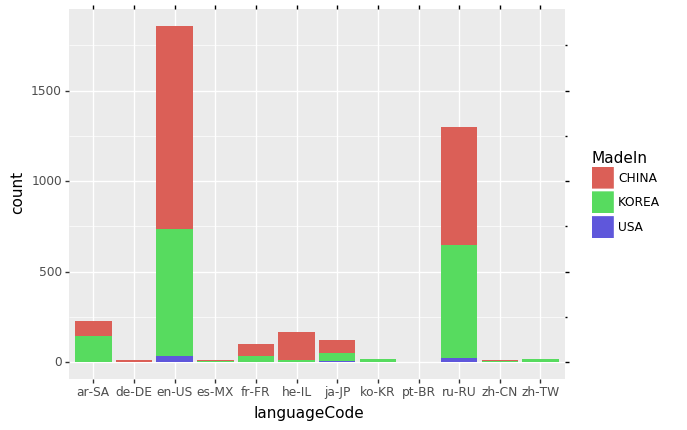

<ggplot: (-9223371930561653108)>

In [954]:
ggplot(df_productReview_clean) +\
geom_bar(mapping = aes(x = 'languageCode', fill = 'MadeIn'))

<font color= 'Green'> **Observations** </font>  

It is clear that:
* The distribution of language in each product are similar.  
* The QA ratio of the popular product are higher  
    * well, the causuality cannot be confirmed in this case  
    * you cant be sure if people buy more because the questions are well answered
    * or there are more question and answers because there are more people buying  
    
A suitable conclusion is that more detailed description and effort in answering customers' questions may help to win their heart and attract them into buying the mask.  


<br>
<hr>
<br>  

<font color= 'Orange'> **New Question** </font>  

* what is the distribution of rating values in the top 10 products?  
* how to define top 10 products?
    * by review count?
    * by ratingValue?  
* what is the distribution of ratingValue in each product?  

In [496]:
# product with at least 200 review
minRevProd = temp[temp.Count > 200].product_id
minRevProd = df_productReview_clean[df_productReview_clean.product_id.isin(minRevProd)]
minRevProd['product_id'] = minRevProd['product_id'].astype('str')

In [551]:
minRevProd = minRevProd.groupby(['product_id','ratingValue']).agg({'id': len})
minRevProd.reset_index(inplace = True)

In [559]:
minRevProd['ratingValueProportion'] = minRevProd.groupby('product_id').id.transform(lambda x: x/x.sum())

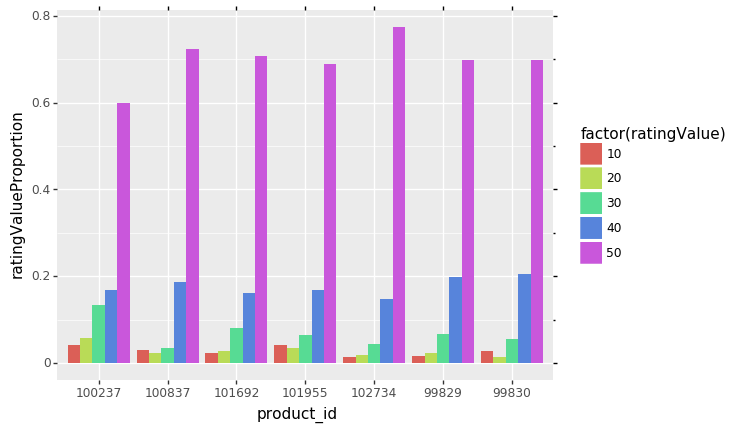

<ggplot: (-9223371930560730384)>

In [565]:
ggplot(data = minRevProd) +\
geom_col(aes(x = 'product_id', y = 'ratingValueProportion', fill = 'factor(ratingValue)'), position = 'dodge')

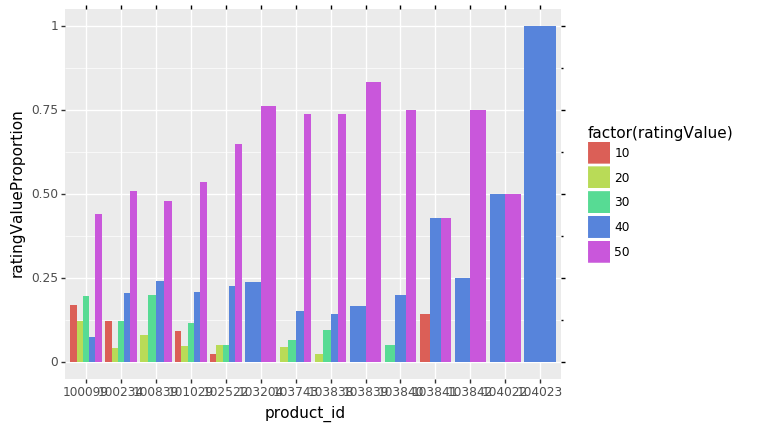

<ggplot: (-9223371930559189884)>

In [568]:
# product with at most 50 review
minRevProd = temp[temp.Count < 50].product_id
minRevProd = df_productReview_clean[df_productReview_clean.product_id.isin(minRevProd)]
minRevProd['product_id'] = minRevProd['product_id'].astype('str')

minRevProd = minRevProd.groupby(['product_id','ratingValue']).agg({'id': len})
minRevProd.reset_index(inplace = True)

minRevProd['ratingValueProportion'] = minRevProd.groupby('product_id').id.transform(lambda x: x/x.sum())

ggplot(data = minRevProd) +\
geom_col(aes(x = 'product_id', y = 'ratingValueProportion', fill = 'factor(ratingValue)'), position = 'dodge')

<font color= 'Green'> **Observations** </font>  

It is clear that:
* when filtered by the number of reviews, product with higher reviews tend to have higher proportion of good reviews  
* product with less number of reviews, tend to have increasing proportion of low review scores.  
* in some sense, the number of review can reflect the popularity to a certain level  

This could be a few reasons:    
* Good product lead to good review, good review attract more customer  
* low number of reviews lead to lowest trust in the brand/product --> hence less purchase  

<br>
<hr>
<br>  

<font color= 'Orange'> **New Question** </font>    
* what is the distribution of review in product from different country?    

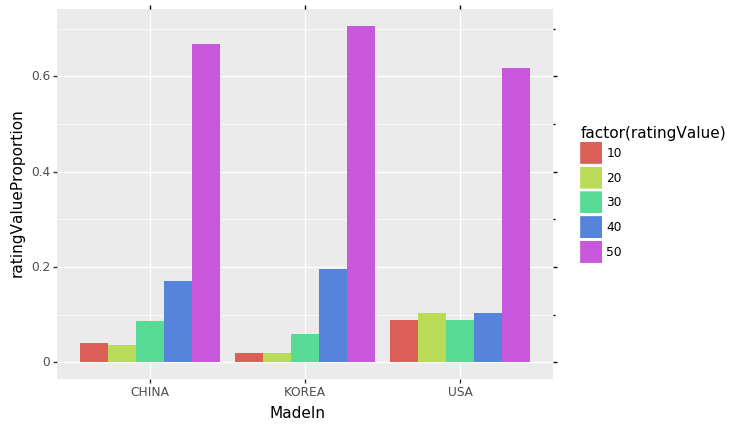

<ggplot: (-9223371930557681072)>

In [570]:
countryReview = df_productReview_clean.groupby(['MadeIn','ratingValue']).agg({'id': len})
countryReview.reset_index(inplace = True)

countryReview['ratingValueProportion'] = countryReview.groupby('MadeIn').id.transform(lambda x: x/x.sum())

ggplot(data = countryReview) +\
geom_col(aes(x = 'MadeIn', y = 'ratingValueProportion', fill = 'factor(ratingValue)'), position = 'dodge')

<font color= 'Green'> **Observations** </font>  

It is clear that:
* USA product has slighly higher proportion of lower ratings, seems to suggest that customers are less satisfied with USA products  
* Korea and China products have comparable distribution of rating values  


<br>
<hr>
<br>  

<font color= 'Orange'> **New Question** </font>    
* For the reviews in each product or from each company or from each country; what are the praises/critics received in the review?  


## Advance Questions  

* what are the keywords associated to:
    * each product
    * each brand  
    * each country
    * each ratingValue range   
    

In [633]:
# cast Reviews to High, Medium and Low
data = {50:'High', 40:'Medium'}

rating_cat = df_productReview_clean['ratingValue'].apply(lambda x: data.get(x, 'Low'))
rating_cat = pd.Categorical(rating_cat, categories=['High', 'Medium', 'Low'])
df_productReview_clean['ratingCat'] = rating_cat

In [590]:
def mergeReviews(reviews):
    return " ".join(reviews)

### Text Cleaning  

In [631]:
non_eng_char_pattern = re.compile(r'''[^A-Z]''', re.VERBOSE)

def basicClean(text):
    text = text.upper()                                 # capitalise text
    text = re.sub(non_eng_char_pattern,r' ', text)      # keep only english tokens
    return text

In [937]:
stop = STOPWORDS
stop.update({'MASK', 'MASKS'})
stop = set(s.upper() for s in stop)

def getWordFreq(text,nGram = 1):
    # text = text.upper()
    tokens = word_tokenize(text)
    freq = Counter(tokens).items()
    
    freq = dict((tok, count) for tok,count in freq if tok not in stop)
    return freq

In [938]:
%%time
# df_productReview_clean['reviewClean'] = df_productReview_clean.apply(lambda x: x['translation.reviewTitle'] +\
#                                                                      " " + x['translation.reviewText'], axis = 1)

df_productReview_clean['reviewClean'] = df_productReview_clean['translation.reviewText']

df_productReview_clean['reviewClean'] = df_productReview_clean['reviewClean'].apply(basicClean) 

Wall time: 35 ms


In [939]:
df_productReview_clean['reviewLen'] = df_productReview_clean['reviewClean'].apply(len)

The postulation was that perhaps the bad reviews may tend to be longer in length as the customers might have more things to complain; while the good reviews might be shorter because customers usually make breif compliments to the product.  

Turns out the above assumption was not true as the distribution of the len of text are similar in the rating categories.  

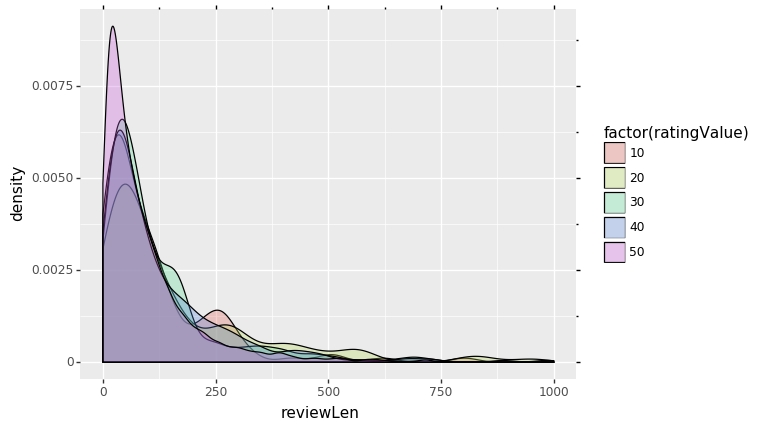

<ggplot: (-9223371930555865136)>

In [940]:
ggplot(df_productReview_clean) +\
geom_density(aes(x = 'reviewLen', fill='factor(ratingValue)'), alpha = 0.3) +\
xlim(0, 1000)

### Review per Country  

In [843]:
reviewPerCountry = df_productReview_clean.groupby(['MadeIn', 'ratingCat']).agg({
    'reviewClean': mergeReviews
})
reviewPerCountry

reviewClean
MadeIn ratingCat                                                   
CHINA  High       THE MASK IS COMFORTABLE  FITS TIGHTLY TO THE F...
       Medium     THE MASKS ARE PRETTY GOOD  I ORDERED AFTER WEA...
       Low        BOUGHTIT AS THEY WERE CHEAP  AND THOUGHT IHERB...
KOREA  High       IT IS GOOD TO GET SUCH A MASK  AS THEY HAVE RE...
       Medium     I LIKE THESE MASKS  THE ONLY NEGATIVE IS THAT ...
       Low        THESE MASK WERE A LITTLE TOO LOSE ON MY FACE  ...
USA    High       DARK GRAY  COMFORTABLE MASK  THE LOGO LOOKS VE...
       Medium     THIS MASK DOES NOT PROTECT  SO IT IS EASY TO B...
       Low        I DIDN     T LIKE THE MASK  PURELY NOMINAL  AN...

In [941]:
def breakSentence(text: str) -> pd.Series:
    '''
    split a text into a series of its (1-3)-grams
    
    remove stopwords from single-gram
    remove short tokens from single-gram (len \leq 3)
    
    this function is to be followed after a groupby
    so to split all the tokens present in a group
    '''
    
    MonoGram = word_tokenize(text)
    MonoGram = (mono for mono in MonoGram if mono not in stop and len(mono) > 3)
    
    BiGram = ngrams(MonoGram, 2)
    BiGram = (" ".join(bi) for bi in BiGram)
    
    TriGram = ngrams(MonoGram, 3)
    TriGram = (" ".join(tri) for tri in TriGram)
    
    
    
    NGram = chain(MonoGram, BiGram, TriGram)
    return pd.DataFrame(NGram, columns = ['TOKEN'])

def spreadGroup(descriptions : pd.DataFrame):
    return pd.concat(descriptions.apply(breakSentence).tolist())

In [942]:
tokenCount = reviewPerCountry.groupby(['MadeIn','ratingCat']).reviewClean.apply(spreadGroup)
tokenCount.reset_index(level = 2, drop=True)
tokenCount = pd.DataFrame(tokenCount.groupby(['MadeIn','ratingCat','TOKEN']).agg(len), columns = ['TOKEN_CNT'])
tokenCount.reset_index(inplace = True)
# the same token must appeared more than 3
tokenCount = tokenCount[tokenCount.TOKEN_CNT>3]

# double the count for long tokens  
tokenCount['TOKEN_CNT'] = tokenCount.apply(lambda row: row.TOKEN_CNT * (max(1, row.TOKEN.count(' '))), axis = 1)

tokenCount['TOKEN_weight'] = tokenCount.groupby(['TOKEN','MadeIn']).TOKEN_CNT.transform(lambda x:x/x.sum())
tokenCount['TOKEN_strength'] =  tokenCount.groupby(['TOKEN']).TOKEN_weight.transform(lambda x:x/(3-x/len(x)))

In [943]:
tokenCount[tokenCount.TOKEN == 'MASK']

,MadeIn,ratingCat,TOKEN,TOKEN_CNT,TOKEN_weight,TOKEN_strength


In [944]:
tokenCount[tokenCount.TOKEN == 'ADJUST']

,MadeIn,ratingCat,TOKEN,TOKEN_CNT,TOKEN_weight,TOKEN_strength
4109,KOREA,High,ADJUST,21,0.75,0.272727
6009,KOREA,Medium,ADJUST,7,0.25,0.085714
7754,USA,High,ADJUST,5,1.00,0.375000


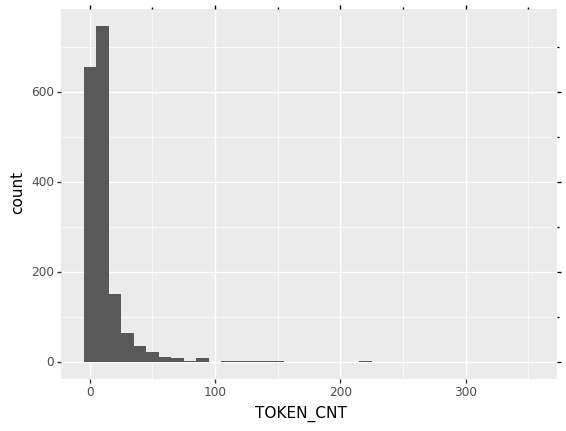

<ggplot: (-9223371930555519224)>

In [945]:
ggplot(tokenCount) +\
geom_histogram(aes(x = 'TOKEN_CNT'), binwidth=10)

In [904]:
wordFreqPerCountry = []

for country in ['CHINA', 'KOREA', 'USA']:
    temp = tokenCount[(tokenCount.MadeIn == country) &\
                      (tokenCount.TOKEN_strength > 0.25)]
    for ratingCat in ['High', 'Medium', 'Low']:
        freq = dict(zip(temp[temp.ratingCat==ratingCat].TOKEN, 
                        temp[temp.ratingCat==ratingCat].TOKEN_CNT))
        freq = {" ": 1} if len(freq) == 0 else freq
        wordFreqPerCountry.append((country, ratingCat, freq))

Wall time: 24.3 s


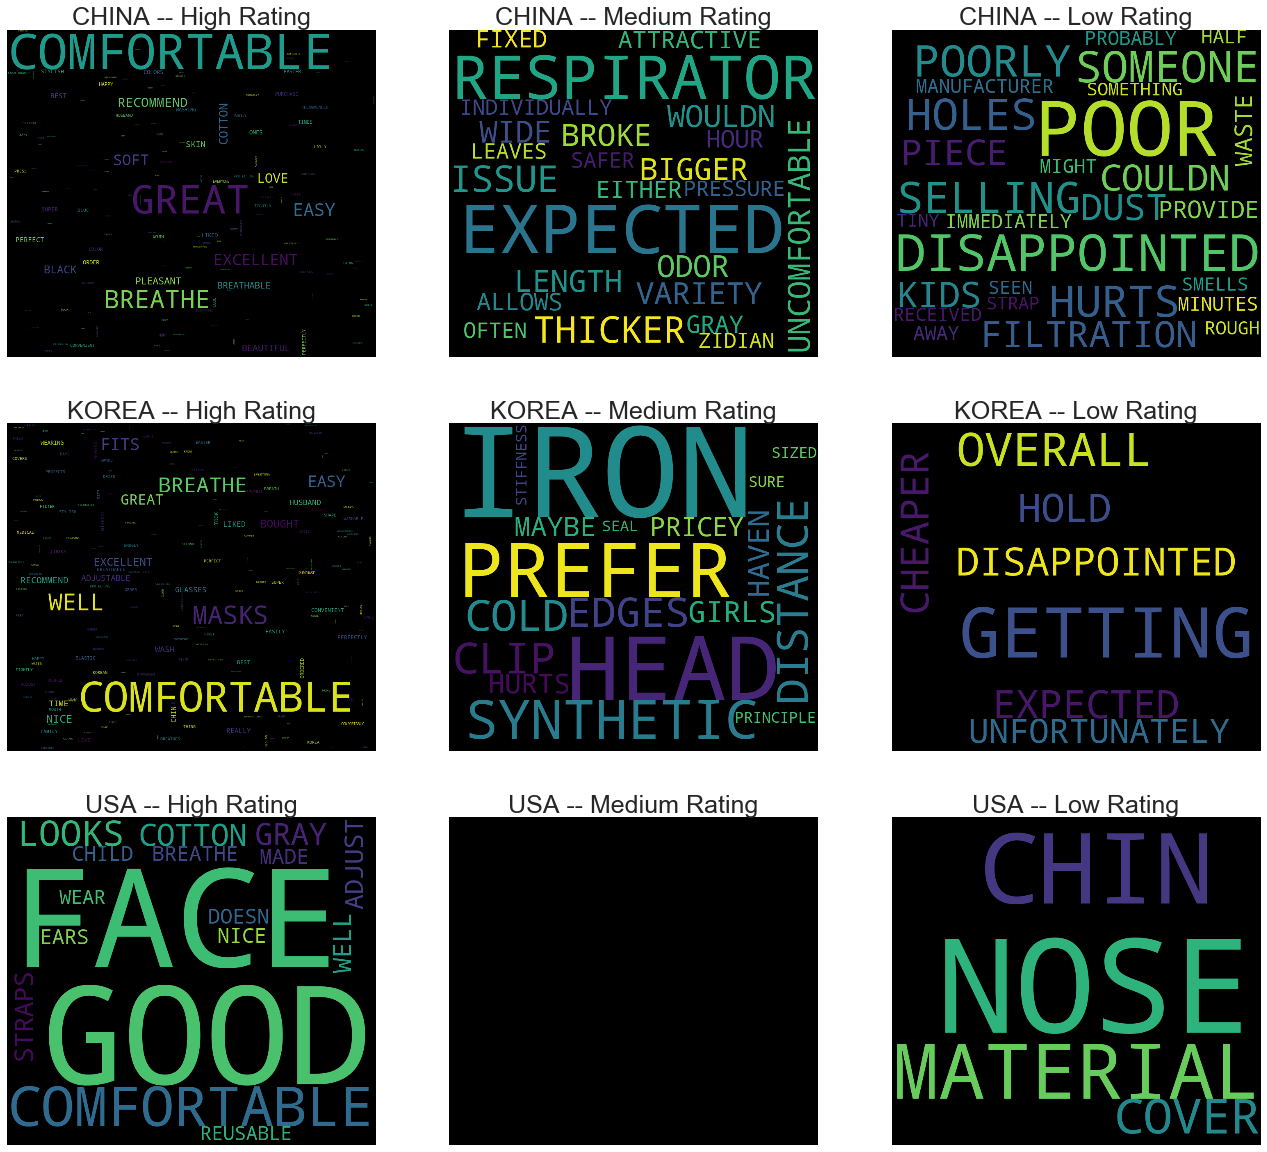

In [918]:
%%time 

plt.figure(figsize=(20, 20))

i = 1
for country, ratingCat, freq in wordFreqPerCountry:
    
    wordcloud = WordCloud(width=900,height=800, 
                          # background_color='white', 
                      max_words=1628, 
                      relative_scaling=1,
                      normalize_plurals=False).generate_from_frequencies(freq)
    
    plt.subplot(3, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{country} -- {ratingCat} Rating', fontsize=25)
    i+=1

In [909]:
def readReviews(keyword, 
                data = df_productReview_clean,
                returning = False,
               **kargs):
    for field, value in kargs.items():
        data = data[data[field]==value]
    data = data.loc[data.reviewClean.str.contains(keyword), 'reviewClean']
    
    if returning:
        return data
    for i in data:
        i = i.replace(keyword, f'<<{keyword}>>')
        print(i)
        print('-'*100)

In [910]:
readReviews(keyword = 'POOR',
           MadeIn = 'CHINA',
           ratingCat = 'Low')

I ALSO WAS STUPID ENOUGH TO GOOGLE THE MASK AFTER PURCHASING IT  TURNS OUT  WE SHOULDN     T BE TOO HASTY TO TRUST IHERB TO SELL ONLY THE GOODS THAT MEET THE ADVERTISED STANDARDS AND PASS THE REQUIRED TESTS  FILTRATION IS         I FEEL ROBBED OF MY MONEY AND DECEIVED  JUST LIKE THE OTHER <<POOR>> FELLOW WHO WROTE THE REVIEW  I BELIEVED THE AYHERB  I THOUGHT THEY WOULD NOT SELL UNVERIFIED GOODS WITHOUT PROPER CERTIFICATES  HOWEVER  THIS IS A BIG MISCONCEPTION  PUBLICLY AVAILABLE TESTS OF THESE MASKS  FILTRATION         WEARING SUCH A MASK  BEING SURE THAT IT FILTERS      IS A DIRECT HEALTH HAZARD  I     M TERRIFIED  THE FIRST TIME I AM WRITING A REVIEW  I AM SO OUTRAGED  BUT  EVERYONE ASKS TO PRESS  QUOT YES QUOT   I DON     T KNOW WHY  BUT PROBABLY FOR A REASON  DO IT  IT     S FREE FOR YOU    
----------------------------------------------------------------------------------------------------
VERY BAD QUALITY OF MASKS  UNCOMFORTABLE FIT  <<POOR>> QUALITY OF EAR STRAPS 
--------------

In [872]:
readReviews(keyword = 'DISAPPOINTED',
           MadeIn = 'CHINA',
           ratingCat = 'Low')

VERY DISAPPOINTED  I DID NOT READ THE COMMENTS BEFORE AND TRUSTED THE WORD OF IHERB  AND IT IS NOT TRUE THAT THE SUPPOSED NEW MODEL THEY SELL IS CERTIFIED  BECAUSE LOOKING FOR JUST A LITTLE INFORMATION YOU CAN SEE THAT IT DOES NOT FILTER HARDLY ANY PARTICLES  
----------------------------------------------------------------------------------------------------
I BOUGHT   PACKAGES UNFORTUNATELY   THE MASKS HAVE HOLES  THIS MASK IS NEVER A REAL KN     I M VERY DISAPPOINTED 
----------------------------------------------------------------------------------------------------
I DO NOT FEEL THE MASKS ARE SAFE ENOUGH I THINK THEY ARE TOO THIN  I WILL TRY TO USE TWO AT A TIME NEXT TIME I FEEL THE COLOR IS NICE BUT I WAS DISAPPOINTED
----------------------------------------------------------------------------------------------------
WAS DISAPPOINTED WITH THE MASKS  JUST DID NOT FIT WELL   HAD A SMELL TO THE FABRIC THAT WOULD NOT WASH OUT 
---------------------------------------------------------

In [873]:
readReviews(keyword = 'EXPECTED',
           MadeIn = 'CHINA',
           ratingCat = 'Medium')

I EXPECTED BETTER QUALITY 
----------------------------------------------------------------------------------------------------
AS EXPECTED  EXCELLENT VALUE
----------------------------------------------------------------------------------------------------
DOES WHAT IS EXPECTED WOULD LIKE BIGGER PACKAGE AT EVEN LOWER PRICE PER UNIT  
----------------------------------------------------------------------------------------------------
THE WIRE ON THE NOSE IS ALSO SOLID  AND IT HAS A HIGH DEGREE OF ADHESION TO THE FACE  BUT THERE IS A SPACE AROUND THE MOUTH  SO THERE IS NO PAIN UNEXPECTEDLY  I CAN     T TELL HOW MUCH EPIDEMIC IT WILL BE  BUT I THINK THE MASK STRUCTURE IS VERY GOOD  IT MAY BE AN EXAGGERATION FOR GENERAL USE  BUT I WILL TRY USING IT FOR A WHILE 
----------------------------------------------------------------------------------------------------
MASKS ARE LIKE MASKS  I DON     T KNOW WHAT I EXPECTED OF THEM WHEN I BOUGHT  MADE IN CHINA  THEY BREATHE NORMALLY  DO NOT BRISTLE

In [960]:
readReviews(keyword = 'HEAD',
           MadeIn = 'KOREA',
           ratingCat = 'Medium')

GREAT  SO IHERB BROUGHT THESE IN SO WE HAVE ACCESS TO HIGH FILTERING MASKS  ONLY THING IS I HAVE TO TIE THE ENDS BECAUSE THE STRAPS A BIT LONG IF YOU HAVE A SMALLER <<HEAD>>
----------------------------------------------------------------------------------------------------
VERY GOOD QUALITY  AND WELL CONSTRUCTED  I NORMALLY TAKE A MEDIUM  WESTERN SIZES   AND THESE WERE VERY LARGE FOR MYSELF  KF   S USUALLY FIT A LITTLE SMALLER  SO IT WAS A BIT OF A SURPRISE    IF WORN WITH AN EAR SAVER  YOU CAN IMPROVE THE SEAL  BUT YOU GENERALLY NEED A LARGER <<HEAD>> FOR IT TO NOT AIR GAP  
----------------------------------------------------------------------------------------------------
GREAT  SO IHERB BROUGHT THESE IN SO WE HAVE ACCESS TO HIGH FILTERING MASKS  ONLY THING IS I HAVE TO TIE THE ENDS BECAUSE THE STRAPS A BIT LONG IF YOU HAVE A SMALLER <<HEAD>>
----------------------------------------------------------------------------------------------------
VERY GOOD QUALITY  AND WELL CONSTRUCTED 

In [961]:
readReviews(keyword = 'FACE',
           MadeIn = 'USA',
           ratingCat = 'High')

DARK GRAY  COMFORTABLE MASK  THE LOGO LOOKS VERY GOOD  SUITABLE FOR A SMALLER <<FACE>> 
----------------------------------------------------------------------------------------------------
I GAVE THE MASK TO A FRIEND  IT S SUITABLE FOR A SMALL <<FACE>>  IT DOESN T PROTECT  BUT IT S VERY COMFORTABLE AND LOOKS GOOD  IT DOESN T INTERFERE WITH BREATHING 
----------------------------------------------------------------------------------------------------
AS THEY HAVE ALREADY WRITTEN  THE MASK IS FOR A SMALL <<FACE>>   A CHILD OR A WOMAN  THE DESIGN IS GOOD  AND I ESPECIALLY LIKE THE SYSTEM FOR TIGHTENING AROUND THE EARS  REDUCES THE DELIVERY PRICE 
----------------------------------------------------------------------------------------------------
THE MASK FITS WELL ON THE <<FACE>>  IT S SMALL FOR AN ADULT AND DOESN T PREFER IT  BUT THAT S EXACTLY WHAT I LIKE BECAUSE IT DOESN T INTERFERE WITH BREATHING 
----------------------------------------------------------------------------------------

In [962]:
readReviews(keyword = 'NOSE',
           MadeIn = 'USA',
           ratingCat = 'Low')

IN PRINCIPLE  AT FIRST IT SEEMS THAT THE MASK IS NOT BAD     BUT THERE IS STILL SPACE BELOW THE CHIN  AND MOST IMPORTANTLY  ABOVE THE <<NOSE>>  IT DOES NOT FIT IT  THERE IS NO WIRE INSIDE  THUS  THE EFFECTIVENESS OF THIS MASK IS MINIMIZED  IT CAN BE PUT ON  LIKE YOU HAVE A MASK ON YOUR FACE  BUT IN FACT IT IS ALMOST USELESS  I DO NOT RECOMMEND BUYING IT    IT IS VERY NARROW AND DOES NOT FIT THE <<NOSE>> WELL  HANGS LIKE A RAG 
----------------------------------------------------------------------------------------------------
PEOPLE WITH SENSITIVE SKIN SHOULD STOP BUYING  IT RUBS AGAINST THE CHEEKS AND CAUSES ROUGH SKIN  ALSO  BECAUSE THE LENGTH OF THE MASK IS SHORT  IF YOU COVER YOUR <<NOSE>>  YOUR CHIN WILL COME OUT  AND IF YOU COVER YOUR CHIN  THERE WILL BE A GAP NEXT TO YOUR <<NOSE>> 
----------------------------------------------------------------------------------------------------
THE MASK IS NOT TOO SMALL FOR MY FACE  BUT THERE IS ONLY ONE FOLD IN THE MATERIAL FOR EXPANDING THE

In [912]:
readReviews(keyword = 'DIFFICULT',
           MadeIn = 'CHINA',
           ratingCat = 'Low')

I DIDN     T LIKE IT AT ALL  VERY CRUSHING  OAK  IT IS <<DIFFICULT>> TO BREATHE IN THEM 
----------------------------------------------------------------------------------------------------
COMPLETE BULLSHIT  DON     T BUY THIS RAG  PACKAGING IS A REGULAR BAG  NOT EVEN SEALED  THERE ARE    MASKS INSIDE  BUT IT IS <<DIFFICULT>> TO CALL THIS A MIRACLE MASKS  IF TWO MEDICAL MASKS ARE FOLDED  THEN THERE WILL BE MORE SENSE  THEY TAKE ADVANTAGE OF THE SITUATION AND SELL EVERYTHING TO THE PEOPLE  DO NOT GET FOOLED  IT IS BETTER TO ORDER ORIGINAL KN   ON ALIEXPRESS  WHICH ARE THREE TIMES CHEAPER THERE  ALSO THE SIZE  I ONLY CAME UP TO THE FACE OF A    YEAR OLD CHILD  THE FIRST TIME I AM WRITING A NEGATIVE REVIEW HERE  BUT THESE MASKS DO NOT DIRECTLY RECOMMEND
----------------------------------------------------------------------------------------------------
THE MASK FITS VERY TIGHTLY TO THE FACE  THE AIR PRACTICALLY DOES NOT PASS AND IT IS VERY <<DIFFICULT>> FOR ME PERSONALLY TO BREATHE IN IT

In [920]:
readReviews(keyword = 'PREFER',
           MadeIn = 'KOREA',
           ratingCat = 'Medium')

I HAVE NO IDEA IF THIS IS A LEGIT MASK THAT IS ACTUALLY FROM KOREA  BUT I WILL ASSUME IT IS  I DO LIKE IT BECAUSE IT FITS MY FACE PERFECTLY AND CREATES A GOOD SEAL  IT HAS THAT TYPICAL SURGICAL MASK SMELL  THE FRONT STAYS PRETTY STIFF WHICH IS GOOD AND IT HAS A STRONG NOSE WIRE  I ALSO BOUGHT THE ATEX HIGUARD KF   MASK THAT S AVAILABLE HERE  BUT I <<PREFER>> THIS ONE BECAUSE OF THE BETTER FIT AND BETTER STIFFNESS 
----------------------------------------------------------------------------------------------------
I HAVE NO IDEA IF THIS IS A LEGIT MASK THAT IS ACTUALLY FROM KOREA  BUT I WILL ASSUME IT IS  I DO LIKE IT BECAUSE IT FITS MY FACE PERFECTLY AND CREATES A GOOD SEAL  IT HAS THAT TYPICAL SURGICAL MASK SMELL  THE FRONT STAYS PRETTY STIFF WHICH IS GOOD AND IT HAS A STRONG NOSE WIRE  I ALSO BOUGHT THE ATEX HIGUARD KF   MASK THAT S AVAILABLE HERE  BUT I <<PREFER>> THIS ONE BECAUSE OF THE BETTER FIT AND BETTER STIFFNESS 
---------------------------------------------------------------

In [921]:
readReviews(keyword = 'NOSE',
           MadeIn = 'USA',
           ratingCat = 'Low')

IN PRINCIPLE  AT FIRST IT SEEMS THAT THE MASK IS NOT BAD     BUT THERE IS STILL SPACE BELOW THE CHIN  AND MOST IMPORTANTLY  ABOVE THE <<NOSE>>  IT DOES NOT FIT IT  THERE IS NO WIRE INSIDE  THUS  THE EFFECTIVENESS OF THIS MASK IS MINIMIZED  IT CAN BE PUT ON  LIKE YOU HAVE A MASK ON YOUR FACE  BUT IN FACT IT IS ALMOST USELESS  I DO NOT RECOMMEND BUYING IT    IT IS VERY NARROW AND DOES NOT FIT THE <<NOSE>> WELL  HANGS LIKE A RAG 
----------------------------------------------------------------------------------------------------
PEOPLE WITH SENSITIVE SKIN SHOULD STOP BUYING  IT RUBS AGAINST THE CHEEKS AND CAUSES ROUGH SKIN  ALSO  BECAUSE THE LENGTH OF THE MASK IS SHORT  IF YOU COVER YOUR <<NOSE>>  YOUR CHIN WILL COME OUT  AND IF YOU COVER YOUR CHIN  THERE WILL BE A GAP NEXT TO YOUR <<NOSE>> 
----------------------------------------------------------------------------------------------------
THE MASK IS NOT TOO SMALL FOR MY FACE  BUT THERE IS ONLY ONE FOLD IN THE MATERIAL FOR EXPANDING THE

## Review per Brand  

In [886]:
%%time

tokenCount = df_productReview_clean.groupby(['product_id','ratingCat']).reviewClean.apply(spreadGroup)
tokenCount.reset_index(level = 2, drop=True)
tokenCount = pd.DataFrame(tokenCount.groupby(['product_id','ratingCat','TOKEN']).agg(len), columns = ['TOKEN_CNT'])
tokenCount.reset_index(inplace = True)
# the same token must appeared more than 3
tokenCount = tokenCount[tokenCount.TOKEN_CNT>3]

# double the count for long tokens  
tokenCount['TOKEN_CNT'] = tokenCount.apply(lambda row: row.TOKEN_CNT * (max(1, row.TOKEN.count(' '))), axis = 1)

tokenCount['TOKEN_weight'] = tokenCount.groupby(['TOKEN','product_id']).TOKEN_CNT.transform(lambda x:x/x.sum())
tokenCount['TOKEN_strength'] =  tokenCount.groupby(['TOKEN']).TOKEN_weight.transform(lambda x:x/(3-x/len(x)))

In [896]:
wordFreqPerProduct = []

top_products = ['101955', '100237', '99830', '102734',]
for prod in top_products:
    temp = tokenCount[(tokenCount.product_id == prod) &\
                      (tokenCount.TOKEN_strength > 0.25)]
    
    for ratingCat in ['High', 'Medium', 'Low']:
        freq = dict(zip(temp[temp.ratingCat==ratingCat].TOKEN, 
                        temp[temp.ratingCat==ratingCat].TOKEN_CNT))
        freq = {" ": 1} if len(freq) == 0 else freq
        wordFreqPerProduct.append((prod, ratingCat, freq))

Wall time: 28.8 s


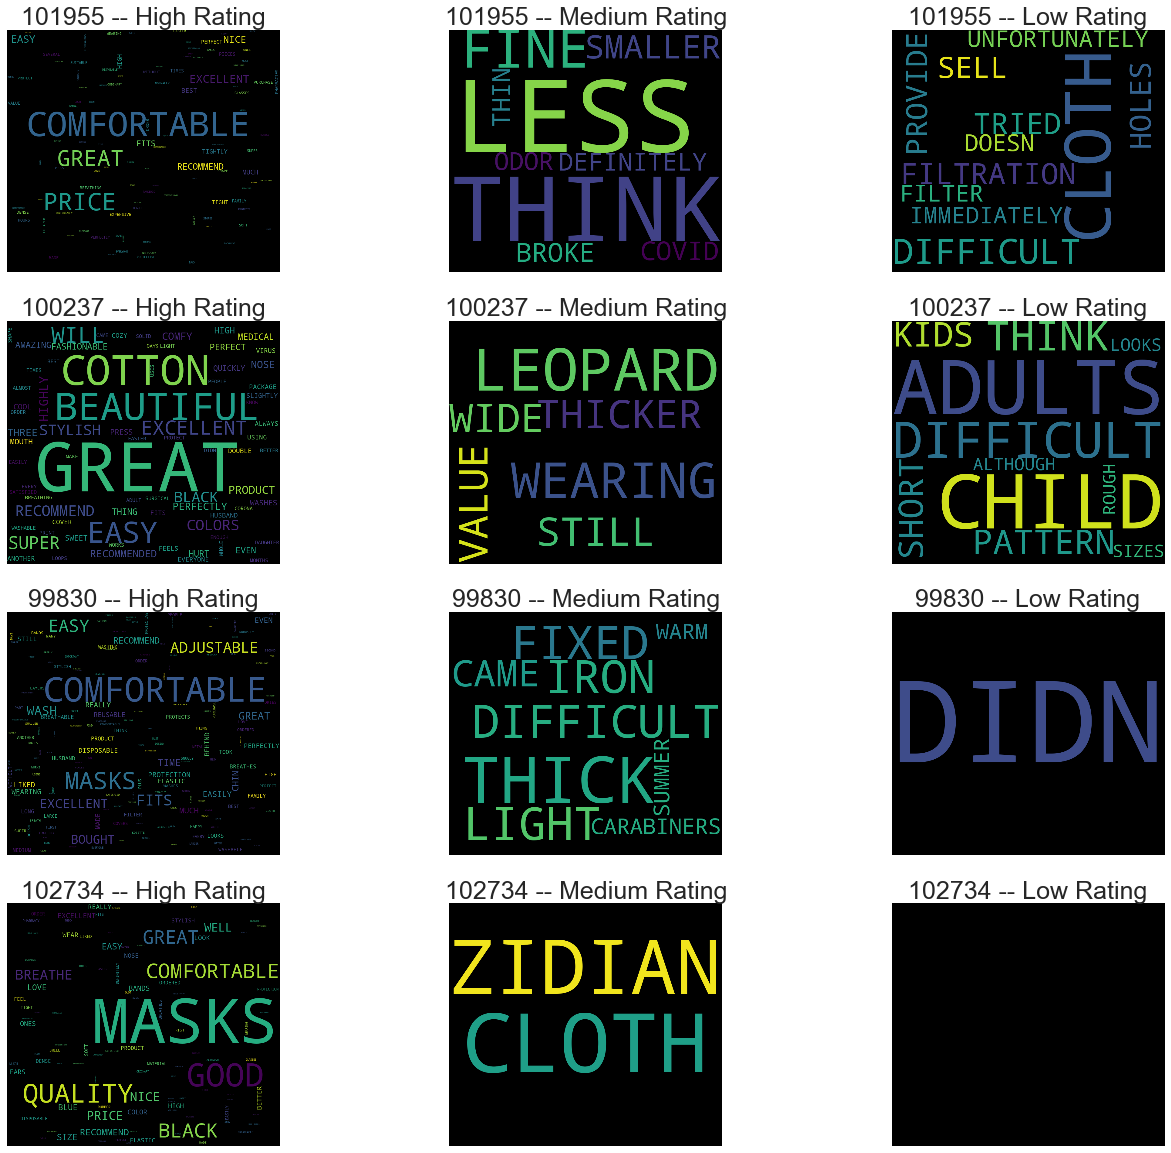

In [919]:
%%time 

plt.figure(figsize=(20, 20))

i = 1
for prod, ratingCat, freq in wordFreqPerProduct:
    
    wordcloud = WordCloud(width=900,height=800, 
                          # background_color='white',
                      max_words=1628, 
                      relative_scaling=1,
                      normalize_plurals=False).generate_from_frequencies(freq)
    
    plt.subplot(4, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{prod} -- {ratingCat} Rating', fontsize=25)
    i+=1

In [963]:
readReviews(keyword = 'DIFFICULT',
            product_id = '100237',
           ratingCat = 'Low')

IT     S <<DIFFICULT>> TO BREATHE 
----------------------------------------------------------------------------------------------------
THE MASKS ARE TOO THICK  IT IS <<DIFFICULT>> TO BREATHE IN THEM  AND THE FEELING IS NOT VERY GOOD  ALTHOUGH THEY LOOK VERY BEAUTIFUL
----------------------------------------------------------------------------------------------------
THICK  VERY <<DIFFICULT>> TO BREATHE WITH
----------------------------------------------------------------------------------------------------
I ORDERED THESE MASKS AT A DISCOUNT  THEY ARE MADE OF HIGH QUALITY BUT THEY ARE VERY DENSE AND IT IS <<DIFFICULT>> TO STAY IN THEM FOR A LONG TIME  IT IS <<DIFFICULT>> TO BREATHE  THE MASK QUICKLY GAINS MOISTURE   AND THEY ARE TOO SMALL TO COVER A SMALL PART OF THE FACE  I WILL NOT ORDER THEM AGAIN FOR SURE 
----------------------------------------------------------------------------------------------------
VERY TICK SO <<DIFFICULT>> TO BREATH  THE BLACK ONE IS VERY SMALL SUITABLE F

In [969]:
readReviews(keyword = 'IMMEDIATELY',
            product_id = '101955',
           ratingCat = 'Low')

  OUT OF    MASKS <<IMMEDIATELY>> FLEW RUBBER BANDS
----------------------------------------------------------------------------------------------------
THEY ARE OK  BUT EVERY SECOND MASK I TRIED TO USE HAD A DEFECT   MOSTLY THE STRINGS WOULD FALL OFF ALMOST <<IMMEDIATELY>>  THE BATCH SEEMS TO BE FAULTY  WHICH IS FRUSTRATING IN SUCH A PRODUCT ON WHICH YOUR HEALTH ACTUALLY DEPENDS  I AT FIRST PURCHASED A    PACK HERE WHICH WAS GREAT  UNFORTUNATELY  IT S NO LONGER AVAILABLE ON IHERB  I HOPE THEY BRING IT BACK  
----------------------------------------------------------------------------------------------------
THE FIRST MASK I TRIED ON  HAD THE EAR STRAP <<IMMEDIATELY>> RIPPED OFF  I HAVE   MORE MASKS TO TRY AND SEE  
----------------------------------------------------------------------------------------------------
I OPENED THE PACK  TOOK OUT THE FIRST MASK   THE ELASTIC <<IMMEDIATELY>> CAME OFF  I HAD TO SEW  THE SIZE IS SMALL  IT DOES NOT FIT A LARGE FACE
----------------------------

In [966]:
readReviews(keyword = 'CHILD',
            product_id = '100237',
           ratingCat = 'Low')

UNFORTUNATELY THE SIZES WERE NOT THE SAME  ONE WAS A MASK AS SMALL AS A <<CHILD>>  ISN     T SEWING GOOD 
----------------------------------------------------------------------------------------------------
I THINK THESE MASKS ARE MORE SUITABLE FOR A <<CHILD>>     S FACE 
----------------------------------------------------------------------------------------------------
THEY WERE ALL DIFFERENT WIDTHS AND MOST OF THEM WILL BE TO SMALL FOR MY FACE   SIZES WILL BE GOOD FOR A <<CHILD>>  
----------------------------------------------------------------------------------------------------
UNFORTUNATELY  THIS PRODUCT IS TOO SMALL  I THINK THE SIZING IS BETTER SUITED FOR A <<CHILD>>  NOT ADULTS  IT WAS TOO TIGHT AND DID NOT LEAVE ENOUGH BREATHING ROOM MAKING IT UNCOMFORTABLE  IF YOU RE BUYING FOR SMALL KIDS   GREAT  BUT FOR ADULTS  TRY SOMETHING ELSE PLEASE 
----------------------------------------------------------------------------------------------------
IN TERMS OF QUALITY  THE THREADS ST

In [971]:
readReviews(keyword = 'DIDN',
            product_id = '99830',
           ratingCat = 'Low')

I AM NOT ABLE TO APPRECIATE THIS PRODUCT  BECAUSE I <<DIDN>> T BUY IT FOR MYSELF  BUT IN THEORY IT IS ASSUMED THAT THE NANOFIBER FROM WHICH THE MASK IS MADE IS MUCH COOLER THAN A REGULAR MEDICAL MASK  AND IT PROTECTS BETTER  AND EVEN REUSABLE  IN GENERAL  IT WOULD SEEM THAT THERE ARE SOLID PLUSES  BUT PERSONALLY I USE ORDINARY FABRIC MASKS ON WHICH I DRIP A MIXTURE OF ESSENTIAL OILS  AND THIS IS MUCH COOLER  FROM MY POINT OF VIEW  THAN NANOFIBER  WHICH CANNOT BE SEEN OR TOUCHED   YOU CAN ONLY BELIEVE AS IN THE LORD GOD    I HOPE THAT THE MASK IS REALLY WORTH ITS HIGH PRICE
----------------------------------------------------------------------------------------------------
I <<DIDN>>     T LIKE THE MASK  I CAN     T BREATHE WELL  MY EARS ARE VERY SORE
----------------------------------------------------------------------------------------------------
WE <<DIDN>>     T LIKE THIS MASK 
----------------------------------------------------------------------------------------------------
I <

## Review in ratingCat  

In [946]:
%%time

tokenCount = df_productReview_clean.groupby(['ratingCat']).reviewClean.apply(spreadGroup)
tokenCount.reset_index(level = 1, drop=True)
tokenCount = pd.DataFrame(tokenCount.groupby(['ratingCat','TOKEN']).agg(len), columns = ['TOKEN_CNT'])
tokenCount.reset_index(inplace = True)
# the same token must appeared more than 3
tokenCount = tokenCount[tokenCount.TOKEN_CNT>3]

# double the count for long tokens  
tokenCount['TOKEN_CNT'] = tokenCount.apply(lambda row: row.TOKEN_CNT * (max(1, row.TOKEN.count(' '))), axis = 1)

tokenCount['TOKEN_weight'] = tokenCount.groupby(['TOKEN']).TOKEN_CNT.transform(lambda x:x/x.sum())
tokenCount['TOKEN_strength'] =  tokenCount.TOKEN_weight.transform(lambda x:x/(3-x/len(x)))

Wall time: 4.64 s


In [947]:
tokenCount

,ratingCat,TOKEN,TOKEN_CNT,TOKEN_weight,TOKEN_strength
2,High,ABLE,13,1.000000,0.333406
4,High,ABSOLUTELY,4,1.000000,0.333406
9,High,ACCORDING,5,0.500000,0.166685
13,High,ACNE,4,1.000000,0.333406
17,High,ACTUALLY,15,0.555556,0.185208
...,...,...,...,...,...
5886,Low,WORK,12,0.235294,0.078435
5894,Low,WORTH,8,0.195122,0.065043
5896,Low,WOULDN,4,0.444444,0.148162
5903,Low,WRONG,6,1.000000,0.333406


In [948]:
wordFreq = []



for ratingCat in ['High', 'Medium', 'Low']:
    temp = tokenCount[(tokenCount.TOKEN_strength > 0.2)]

    freq = dict(zip(temp[temp.ratingCat==ratingCat].TOKEN, 
                    temp[temp.ratingCat==ratingCat].TOKEN_CNT))
    freq = {" ": 1} if len(freq) == 0 else freq
    wordFreq.append((ratingCat, freq))

Wall time: 15.1 s


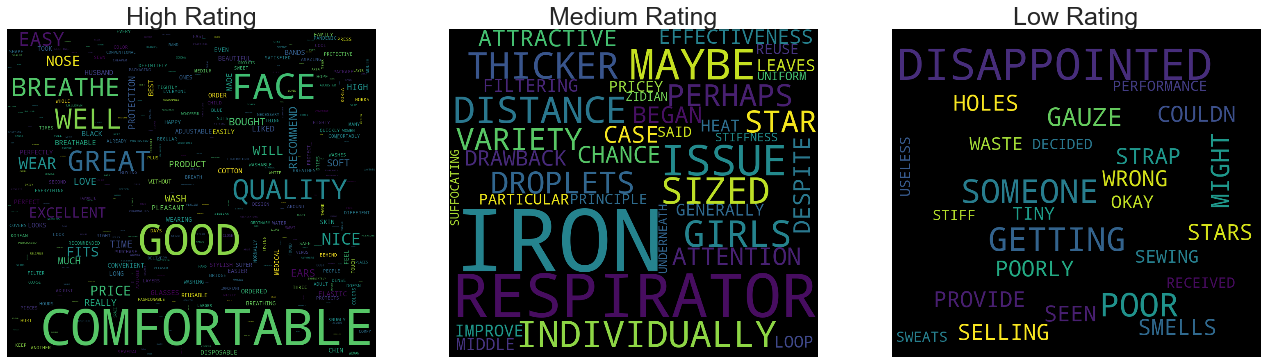

In [949]:
%%time 

plt.figure(figsize=(20, 20))

i = 1
for ratingCat, freq in wordFreq:
    
    wordcloud = WordCloud(width=900,height=800, 
                          # background_color='white',
                      max_words=1628, 
                      relative_scaling=1,
                      normalize_plurals=False).generate_from_frequencies(freq)
    
    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{ratingCat} Rating', fontsize=25)
    i+=1

In [927]:
readReviews(keyword = 'GIRLS',
           ratingCat = 'Medium')

KOREAN KF   MASK IS GOOD ESPECIALLY FOR <<GIRLS>> WHO WILL WEAR MAKE UP TO WORK EVERY DAY    
----------------------------------------------------------------------------------------------------
NOT A BAD MASK  BUT MORE SUITABLE FOR MEN OR <<GIRLS>> WITH A LARGE FACE
----------------------------------------------------------------------------------------------------
KOREAN KF   MASK IS GOOD ESPECIALLY FOR <<GIRLS>> WHO WILL WEAR MAKE UP TO WORK EVERY DAY    
----------------------------------------------------------------------------------------------------
NOT A BAD MASK  BUT MORE SUITABLE FOR MEN OR <<GIRLS>> WITH A LARGE FACE
----------------------------------------------------------------------------------------------------
GREAT FOR MY <<GIRLS>>  NOT SUITABLE FOR MEN
----------------------------------------------------------------------------------------------------
FACE MASKS ARE GOOD FOR US <<GIRLS>> AT THIS TIME  RELEVANT TO ALL HEALTH
------------------------------------------

In [950]:
tokenCount[tokenCount.TOKEN == 'ADJUSTABLE']

,ratingCat,TOKEN,TOKEN_CNT,TOKEN_weight,TOKEN_strength
28,High,ADJUSTABLE,71,0.739583,0.246567
2768,Medium,ADJUSTABLE,18,0.187500,0.062503
4458,Low,ADJUSTABLE,7,0.072917,0.024306


# Other Information  

* Q&A content  
    * for each Q&A, find the flag: Was this answer helpful to you?
* Product Rank on the page  
* Information about the user
    * reviews written
    * stars
    * helpful vote received
* helpful vote of this review  
